# Filling Elevation

In [1]:
import route2vel
from route2vel.loading import *
from route2vel.route import *
from route2vel.extract import *
import os, sys
import pandas as pd
import numpy as np
import osmnx
import math
import contextily as cx

import locale
locale.setlocale(locale.LC_ALL, '')

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.colors as mcolors

plt.style.use('dark_background')
route2vel.utils.debug = True

c:\Users\fillo\anaconda3\envs\osm\lib\site-packages\osmnx\projection.py:3: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
graph_area = "Bologna, Emilia-Romagna, Italy"
origin_loc = "Scuola di Ingegneria, Bologna"
destination_loc = "Bologna Fiere"

In [4]:
route2vel.load_config("../..")

Config file missing, using default...
Saved config at ../..\route2vel.json


In [5]:
route2vel.cfg

{'graphs_dir': 'graph', 'ele_method': 'opentopodata', 'ele_api_key': ''}

In [6]:
graph = load_graph(graph_area, fill_data=False, filename="Bologna_RAW.graphml")

Downloaded in 18.75s!
Saved to c:\Users\fillo\Documents\Universitá\tesim\route2velpy\src\graph\Bologna_RAW.graphml


In [7]:
graph = ox.add_node_elevations_google(
    graph, 
    url_template='https://api.opentopodata.org/v1/aster30m?locations={}&key={}', 
    max_locations_per_batch=100,
    api_key='',
)

In [8]:
def first(g):
    for x in g:
        return x
    
sample_node = first(graph.nodes(data=True))
sample_node[1]

[autoreload of route2vel.route failed: Traceback (most recent call last):
  File "c:\Users\fillo\anaconda3\envs\osm\lib\site-packages\IPython\extensions\autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\fillo\anaconda3\envs\osm\lib\site-packages\IPython\extensions\autoreload.py", line 471, in superreload
    module = reload(module)
  File "c:\Users\fillo\anaconda3\envs\osm\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "c:\Users\fillo\Documents\Universitá\tesim\route2velpy\src\route2vel\route.py", line 73, in <module>
    class RouteNode:
  File "c:\Users\fillo\anaconda3\envs\osm\lib\dataclasses.py", line 1184, in dataclass
    return wrap(cls)
  File "c:\Users\fillo\anaconda3\envs\osm\lib

{'y': 44.5241358, 'x': 11.293704, 'street_count': 3, 'elevation': 34.0}

In [9]:
graph = ox.add_edge_grades(graph)

In [10]:
sample_edge = first(graph.edges(data=True))
print("Sample grade:", sample_edge[2]['grade'])
print("Sample grade (abs):", sample_edge[2]['grade_abs'])

Sample grade: -0.002
Sample grade (abs): 0.002


In [11]:
filled_graph = load_graph(graph_area, fill_data=True, cache_graph=False)

Downloaded in 9.88s!
Filled geometry. Added geometry in 2833 edges
Added elevation in 0.76s
Added edge grades
Added edge speeds
Added edge travel times


In [12]:
sample_node2 = first(filled_graph.nodes(data=True))
sample_node2[1]

{'y': 44.5241358, 'x': 11.293704, 'street_count': 3, 'elevation': 34.0}

In [13]:
sample_edge2 = first(filled_graph.edges(data=True))
print("Sample grade:", sample_edge2[2]['grade'])
print("Sample grade (abs):", sample_edge2[2]['grade_abs'])
print("Sample travel time:", sample_edge2[2]['travel_time'])

Sample grade: -0.002
Sample grade (abs): 0.002
Sample travel time: 137.4


In [14]:
filled_graph_gdf_nodes, filled_graph_gdf_edges = ox.graph_to_gdfs(filled_graph)

In [15]:
print(f"Null values: {filled_graph_gdf_nodes['elevation'].isna().sum() * 100 / len(filled_graph_gdf_nodes['elevation']):.2f}%")
pd.DataFrame(filled_graph_gdf_nodes['elevation'].describe())

Null values: 0.00%


,elevation
count,5869.000000
mean,55.261373
std,26.428174
min,19.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,331.000000


In [16]:
pd.DataFrame(filled_graph_gdf_edges[['grade', 'grade_abs']].describe())

,grade,grade_abs
count,11719.000000,11719.000000
mean,-0.000238,0.048197
std,0.069767,0.050442
min,-0.558000,0.000000
25%,-0.035000,0.011000
50%,0.000000,0.035000
75%,0.034000,0.070000
max,0.562000,0.562000


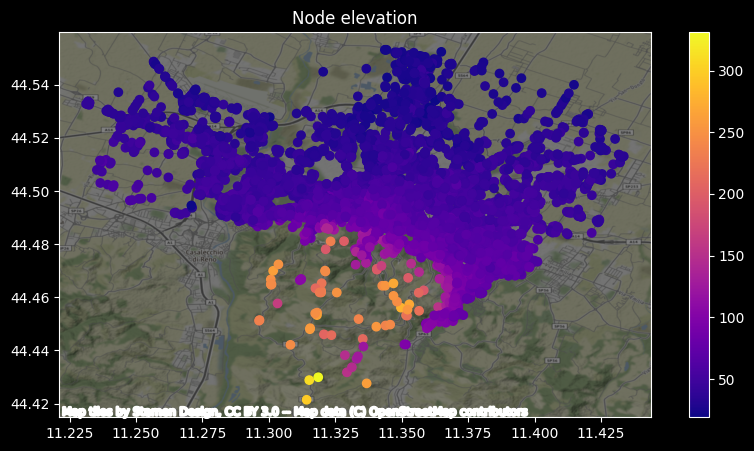

In [17]:
ax = filled_graph_gdf_nodes.plot('elevation', cmap='plasma', figsize=(10, 5), legend=True)
plt.title("Node elevation")
cx.add_basemap(ax, crs=filled_graph_gdf_nodes.crs, alpha=0.5)

[autoreload of route2vel.route failed: Traceback (most recent call last):
  File "c:\Users\fillo\anaconda3\envs\osm\lib\site-packages\IPython\extensions\autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\fillo\anaconda3\envs\osm\lib\site-packages\IPython\extensions\autoreload.py", line 471, in superreload
    module = reload(module)
  File "c:\Users\fillo\anaconda3\envs\osm\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "c:\Users\fillo\Documents\Universitá\tesim\route2velpy\src\route2vel\route.py", line 73, in <module>
    class RouteNode:
  File "c:\Users\fillo\anaconda3\envs\osm\lib\dataclasses.py", line 1184, in dataclass
    return wrap(cls)
  File "c:\Users\fillo\anaconda3\envs\osm\lib

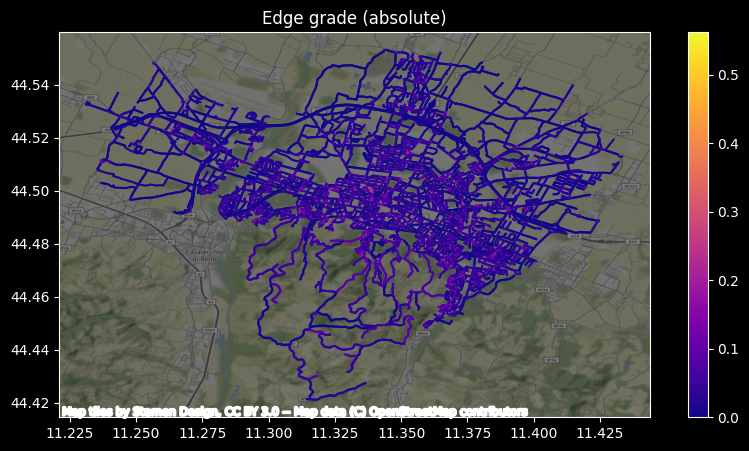

In [18]:
ax = filled_graph_gdf_edges.plot('grade_abs', cmap='plasma', figsize=(10, 5), legend=True)
plt.title("Edge grade (absolute)")
cx.add_basemap(ax, crs=filled_graph_gdf_edges.crs, alpha=0.5)

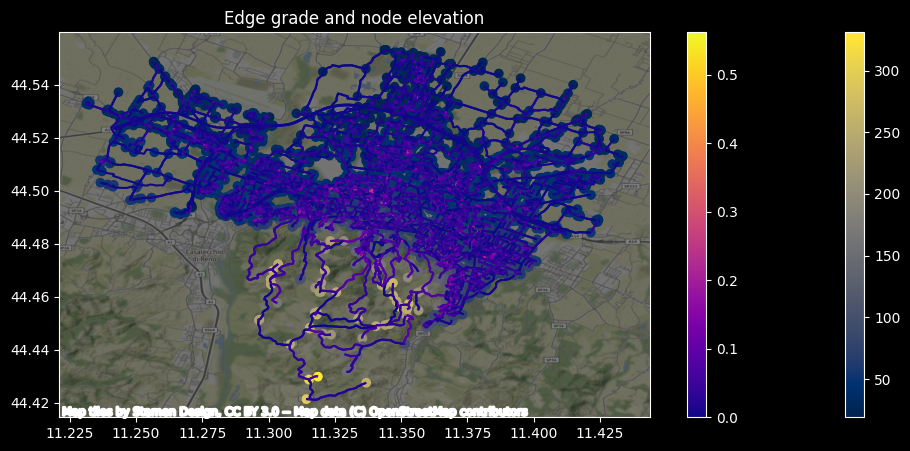

In [19]:
ax = filled_graph_gdf_nodes.plot('elevation', cmap='cividis', figsize=(12, 5), legend=True)
filled_graph_gdf_edges.plot('grade_abs', cmap='plasma', figsize=(12, 5), legend=True, ax=ax)
plt.title("Edge grade and node elevation")
cx.add_basemap(ax, crs=filled_graph_gdf_edges.crs, alpha=0.5)

In [20]:
from shapely import Point

In [21]:
route_streets = route_to_edges(filled_graph, find_route(filled_graph, origin_loc, destination_loc, weight='travel_time'))
pos_spd = route_to_pos_spd(route_streets, use_height=True, height_key='elevation')
pos_spd = add_pos_vel_samples(pos_spd)

pos_spd_gdf = gpd.GeoDataFrame(pos_spd)
pos_spd_gdf

Origin node: 420089880
Destination node: 301866304
Using weight key: travel_time, cost_function: -
Sample dist is 8.00m


,pos,speed,dist,node_id
0,"[11.3274776, 44.4882269, 84.0]",50,0.000000,420089880.0
1,"[11.327555668428346, 44.48824073347605, 83.367...",50,8.000000,NaN
2,"[11.32763373685669, 44.488254566952094, 82.734...",50,16.000000,NaN
3,"[11.327711805285034, 44.48826840042814, 82.102...",50,24.000000,NaN
4,"[11.32778987371338, 44.48828223390419, 81.4693...",50,32.000000,NaN
...,...,...,...,...
996,"[11.370064630802153, 44.51216264838324, 35.553...",30,6840.856448,NaN
997,"[11.3701061, 44.5121308, 35.47027543493965]",30,6845.689774,NaN
998,"[11.37017468048346, 44.51207800952476, 37.4064...",30,6853.689774,NaN
999,"[11.3702225, 44.5120412, 38.756508047386696]",30,6859.267981,NaN


In [22]:
pos_spd_gdf.set_geometry('geometry')
pos_spd_gdf['geometry'] = pd.Series([Point(x[:2]) for x in pos_spd_gdf['pos']])
pos_spd_gdf['z'] = pd.Series([x[2] for x in pos_spd_gdf['pos']])
pos_spd_gdf.plot('z', legend=True)
plt.title("Route elevation");

ValueError: Unknown column geometry